In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as  plt
%matplotlib inline

In [55]:

df = pd.read_csv('TATACONSUM.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-23,90.300003,92.550003,89.199997,90.599998,76.366882,1564718.0
1,2011-06-24,91.500000,93.000000,91.300003,91.800003,77.378365,975813.0
2,2011-06-27,91.050003,94.000000,91.000000,92.050003,77.589096,1261290.0
3,2011-06-28,92.949997,93.050003,91.250000,92.699997,78.136971,1310771.0
4,2011-06-29,93.699997,94.849998,92.699997,93.050003,78.431992,1245523.0


In [56]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2711,2022-06-16,748.750000,748.75,719.049988,724.950012,724.950012,1060953.0
2712,2022-06-17,723.049988,728.50,708.799988,711.650024,711.650024,1329315.0
2713,2022-06-20,718.450012,722.75,705.000000,716.849976,716.849976,1028878.0
2714,2022-06-21,720.000000,733.00,720.000000,727.250000,727.250000,816577.0
2715,2022-06-22,727.000000,727.00,707.000000,708.950012,708.950012,1190195.0


In [57]:
df1 = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-06-23,90.300003,92.550003,89.199997,90.599998,76.366882,1564718.0
1,2011-06-24,91.500000,93.000000,91.300003,91.800003,77.378365,975813.0
2,2011-06-27,91.050003,94.000000,91.000000,92.050003,77.589096,1261290.0
3,2011-06-28,92.949997,93.050003,91.250000,92.699997,78.136971,1310771.0
4,2011-06-29,93.699997,94.849998,92.699997,93.050003,78.431992,1245523.0


In [58]:
df2 = df1.drop(['Date','Adj Close'],axis = "columns")
df2.head()

,index,Open,High,Low,Close,Volume
0,0,90.300003,92.550003,89.199997,90.599998,1564718.0
1,1,91.500000,93.000000,91.300003,91.800003,975813.0
2,2,91.050003,94.000000,91.000000,92.050003,1261290.0
3,3,92.949997,93.050003,91.250000,92.699997,1310771.0
4,4,93.699997,94.849998,92.699997,93.050003,1245523.0


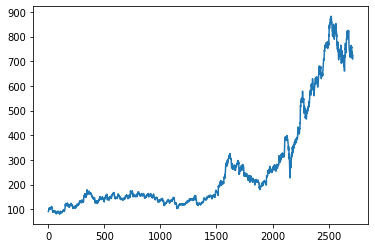

In [59]:
plt.plot(df2.Close)

In [60]:
ma100 = df2.Close.rolling(100).mean()
ma200 = df2.Close.rolling(200).mean()
ma100.head(500)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    139.0885
496    138.9455
497    138.8070
498    138.7025
499    138.5020
Name: Close, Length: 500, dtype: float64

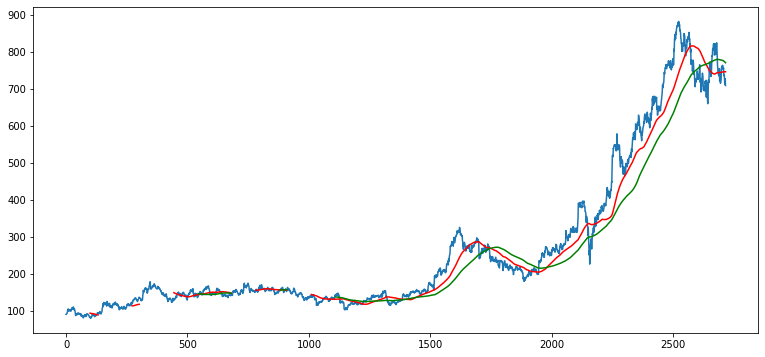

In [61]:
plt.figure(figsize = (13,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [62]:
y = df2['Close']
X = df2.drop(['Close','index'] ,axis="columns")

In [63]:
X = X.dropna()
y = y.dropna()

In [64]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,shuffle=False)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [66]:
X_test.shape

(271, 4)

In [67]:
y_pred = model.predict(X_test)
y_pred.shape

(271,)

In [68]:
y_test = y_test.reset_index()


In [69]:
y_test = y_test.drop('index',axis='columns')

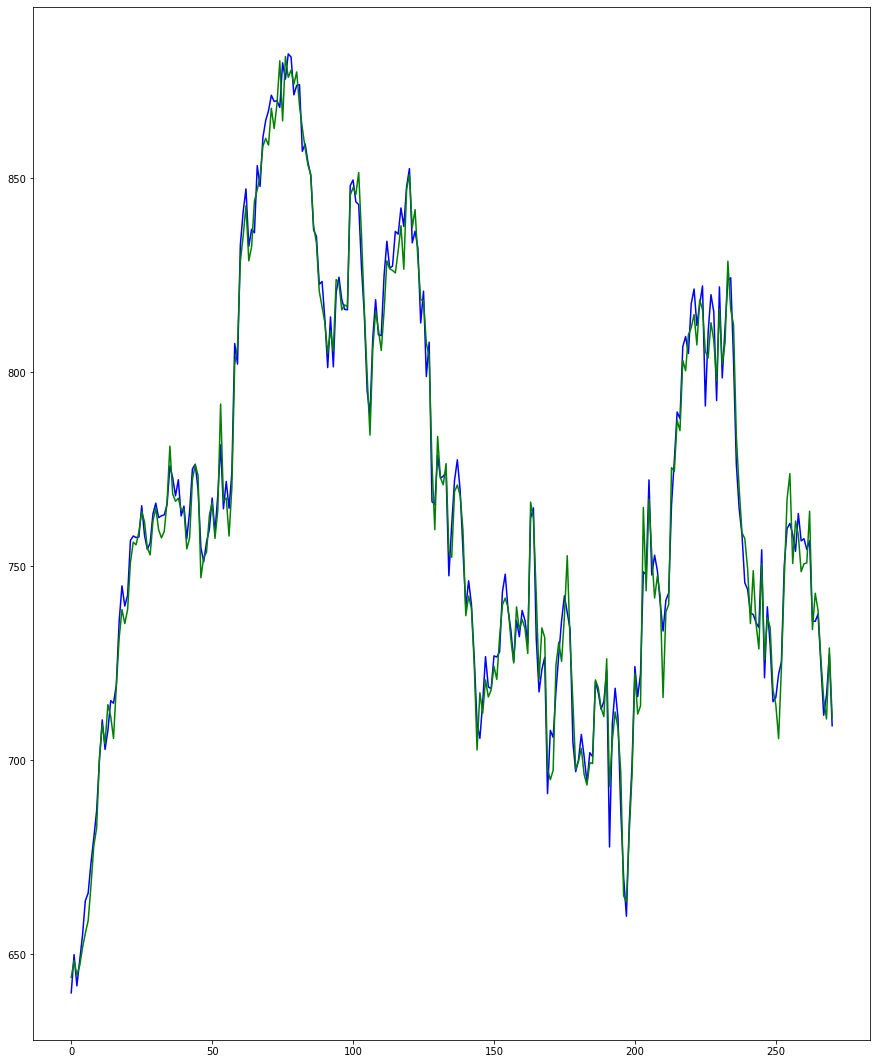

In [70]:
plt.figure(figsize=(15,19))
plt.plot(y_test,'b')
plt.plot(y_pred,'g')

In [71]:
model.predict([[652.000000,	655.000000,	640.650024,	2314694.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([644.70253536])

In [72]:

def prediction(open,high,low,volume):
    close_price = model.predict([[open,high,low,volume]]) 
    return close_price
prediction(727.00,	727.00,	707.00	,	1190195)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([710.99096754])

In [73]:
import pickle 
with open('TATA_pickle','wb') as f : 
  pickle.dump(model,f)

In [74]:
with open('TATA_pickle','rb') as f : 
  mp = pickle.load(f)
  

In [75]:
mp.predict([[727.00,	727.00,	707.00	,	1190195]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([710.99096754])